In [1]:
import pandas as pd

In [2]:
market_data = pd.read_csv('/content/market-capitalization.csv')

In [3]:
market_data.shape

(301, 7)

In [4]:
market_data.head()

,NO,Company Name,Symbol,Price (Rs),Issued Quantity,Market Capitalization,Market Cap. (as a % of Total Market Cap.)
0,1,ABANS ELECTRICALS PLC,ABAN.N0000,410.0,5.110560e+06,2.095330e+09,0.03
1,2,ABANS FINANCE PLC,AFSL.N0000,43.5,7.369317e+07,3.205653e+09,0.05
2,3,ACCESS ENGINEERING PLC,AEL.N0000,42.9,1.000000e+09,4.290000e+10,0.71
3,4,ACL CABLES PLC,ACL.N0000,137.0,2.395747e+08,3.282174e+10,0.54
4,5,ACL PLASTICS PLC,APLA.N0000,670.0,4.212500e+06,2.822375e+09,0.05


In [5]:
market_data.shape

(301, 7)

In [6]:
import pandas as pd
import zipfile
import os

# Define file paths
zip_path = "/content/Sector Data 2.zip"  # file path for the zip file
main_df_path = "/content/market-capitalization.csv"  # file path for the main dataset

# Extract ZIP file
extract_folder = "extracted_data"

csv_directory = "extracted_data/Sector Data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract CSV files into a folder

# Load the main dataframe
main_df = pd.read_csv(main_df_path)

# Standardize column names and clean Symbol values
main_df.columns = main_df.columns.str.strip()
main_df["Symbol"] = main_df["Symbol"].astype(str).str.strip().str.upper()

# Get all CSV files from the extracted folder
csv_files = [f for f in os.listdir(csv_directory) if f.endswith(".csv")]

# Create a dictionary to store sector mapping
sector_mapping = {}

# Process each extracted CSV file
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)

    # Strip spaces from column names
    df.columns = df.columns.str.strip()

    # Check if necessary columns exist
    if "Symbol" in df.columns and "Sector" in df.columns:
        df["Symbol"] = df["Symbol"].astype(str).str.strip().str.upper()
        df["Sector"] = df["Sector"].astype(str).str.strip()

        # Drop rows with missing Symbol or Sector values
        df = df.dropna(subset=["Symbol", "Sector"])

        # Populate the sector mapping dictionary
        for _, row in df.iterrows():
            symbol = row["Symbol"]
            sector = row["Sector"]
            if symbol not in sector_mapping:
                sector_mapping[symbol] = sector  # Assign the first found sector

# Convert sector mapping to a DataFrame
sector_df = pd.DataFrame(list(sector_mapping.items()), columns=["Symbol", "Sector"])

# Standardize column names in sector DataFrame
sector_df.columns = sector_df.columns.str.strip()
sector_df["Symbol"] = sector_df["Symbol"].astype(str).str.strip().str.upper()

# Debugging: Check unique values to compare
# print("Sample Symbols in main_df:", main_df["Symbol"].unique()[:10])
# print("Sample Symbols in sector_df:", sector_df["Symbol"].unique()[:10])

# Merge sector data into the main dataframe
merged_main_df = main_df.merge(sector_df, on="Symbol", how="left")

# Debugging: Check if merge was successful
# print("Merged Data Sample:")
# print(merged_main_df.head())

# Save the final merged dataframe
merged_main_df.to_csv("merged_data.csv", index=False)
print("Merging complete. Saved as merged_data.csv")


Merging complete. Saved as merged_data.csv


In [7]:
merged_main_df.head()

,NO,Company Name,Symbol,Price (Rs),Issued Quantity,Market Capitalization,Market Cap. (as a % of Total Market Cap.),Sector
0,1,ABANS ELECTRICALS PLC,ABAN.N0000,410.0,5.110560e+06,2.095330e+09,0.03,Consumer Durables & Apparel
1,2,ABANS FINANCE PLC,AFSL.N0000,43.5,7.369317e+07,3.205653e+09,0.05,Diversified Financials
2,3,ACCESS ENGINEERING PLC,AEL.N0000,42.9,1.000000e+09,4.290000e+10,0.71,Capital Goods
3,4,ACL CABLES PLC,ACL.N0000,137.0,2.395747e+08,3.282174e+10,0.54,Capital Goods
4,5,ACL PLASTICS PLC,APLA.N0000,670.0,4.212500e+06,2.822375e+09,0.05,Materials


In [8]:
merged_main_df.shape

(301, 8)

In [9]:
# Check for missing values in 'sector' column
missing_sectors = merged_main_df['Sector'].isna().sum()
print(f"Number of missing sector values: {missing_sectors}")

Number of missing sector values: 21


In [10]:


# Display the rows with missing sectors
missing_sector_rows = merged_main_df[merged_main_df['Sector'].isna()]
missing_sector_rows


,NO,Company Name,Symbol,Price (Rs),Issued Quantity,Market Capitalization,Market Cap. (as a % of Total Market Cap.),Sector
7,8,Agarapatana Plantations PLC,AGPL.N0000,13.0,5.000000e+08,6.500000e+09,0.11,NaN
14,15,ALPHA FIRE SERVICES PLC,AFS.N0000,9.2,3.795000e+07,3.491400e+08,0.01,NaN
51,52,CABLE SOLUTIONS PLC,CSLK.N0000,13.1,4.706666e+08,6.165732e+09,0.10,NaN
52,53,CAPITAL ALLIANCE PLC,CALT.N0000,56.0,3.294179e+08,1.844740e+10,0.30,NaN
54,55,CARGILLS BANK PLC,CBNK.N0000,8.6,9.456429e+08,8.132529e+09,0.13,NaN
80,81,Co-operative Insurance Company PLC,COOP.N0000,3.4,1.652178e+09,5.617404e+09,0.09,NaN
96,97,DIGITAL MOBILITY SOLUTIONS LANKA PLC,PKME.N0000,78.0,3.333237e+08,2.599925e+10,0.43,NaN
103,104,E M L CONSULTANTS PLC,EML.N0000,4.0,9.090000e+07,3.636000e+08,0.01,NaN
109,110,Ex-pack Corrugated Cartons PLC,PACK.N0000,15.8,3.333333e+08,5.266667e+09,0.09,NaN
110,111,EXTERMINATORS PLC,EXT.N0000,5.8,5.285246e+07,3.065443e+08,0.01,NaN


In [11]:
merged_main_df = merged_main_df.sort_values(by="Market Capitalization", ascending=False)

In [12]:
merged_main_df.isna().sum()


,0
NO,0
Company Name,0
Symbol,0
Price (Rs),0
Issued Quantity,1
Market Capitalization,11
Market Cap. (as a % of Total Market Cap.),0
Sector,21


In [13]:


# Drop rows with missing 'Market Capitalization' values
merged_main_df = merged_main_df.dropna(subset=['Market Capitalization'])

# Display the updated DataFrame
print(merged_main_df.head())
merged_main_df.shape


      NO                   Company Name      Symbol  Price (Rs)  \
144  145       JOHN KEELLS HOLDINGS PLC   JKH.N0000        22.5   
157  158           L O L C HOLDINGS PLC  LOLC.N0000       694.0   
72    73     CEYLON TOBACCO COMPANY PLC   CTC.N0000      1463.0   
86    87  COMMERCIAL BANK OF CEYLON PLC  COMB.N0000       152.0   
180  181               LOLC FINANCE PLC  LOFC.N0000         6.6   

     Issued Quantity  Market Capitalization  \
144     1.761561e+10           3.960000e+11   
157     4.752000e+08           3.300000e+11   
72      1.873238e+08           2.740000e+11   
86      1.515496e+09           2.300000e+11   
180     3.307921e+10           2.180000e+11   

     Market Cap. (as a % of Total Market Cap.)                   Sector  
144                                       6.54            Capital Goods  
157                                       5.44   Diversified Financials  
72                                        4.52  Food Beverage & Tobacco  
86                

(290, 8)

In [14]:
merged_main_df.isna().sum()

,0
NO,0
Company Name,0
Symbol,0
Price (Rs),0
Issued Quantity,0
Market Capitalization,0
Market Cap. (as a % of Total Market Cap.),0
Sector,21


In [15]:
#sector categories

sector_counts = merged_main_df.groupby('Sector')['Symbol'].count()
sector_counts


,Symbol
Sector,
Automobile & Components,1
Banks,16
Capital Goods,27
Commercial & Professional Service,5
Consumer Durables & Apparel,8
Consumer Services,36
Diversified Financials,37
Energy,3
Food & Staples Retailing,4


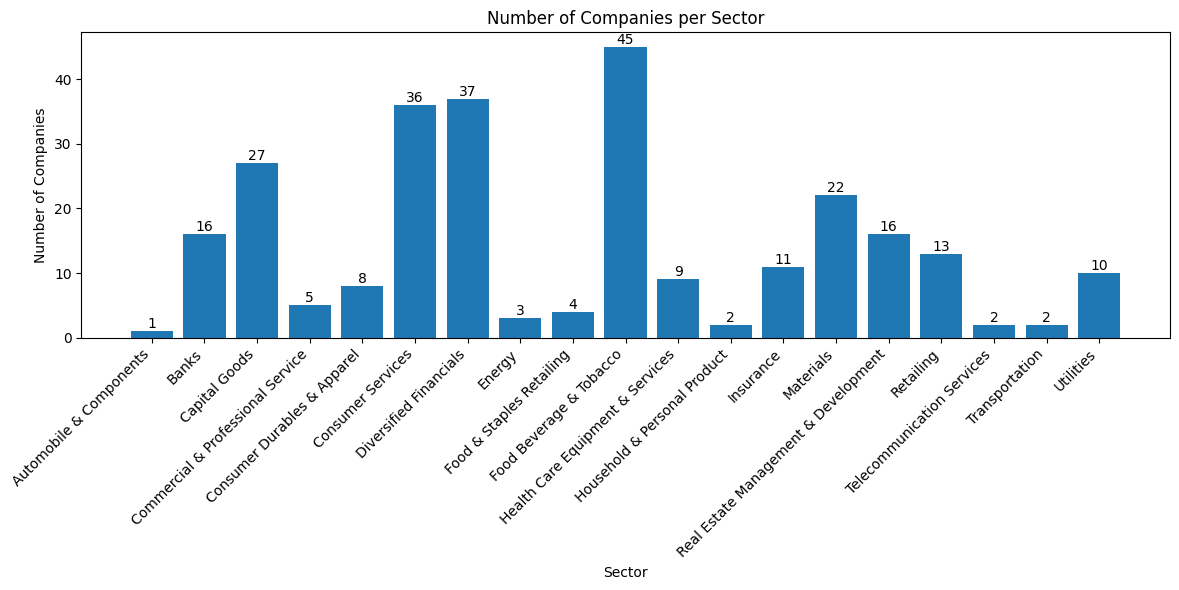

In [16]:


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
bars = plt.bar(sector_counts.index, sector_counts.values)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel("Sector")
plt.ylabel("Number of Companies")
plt.title("Number of Companies per Sector")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


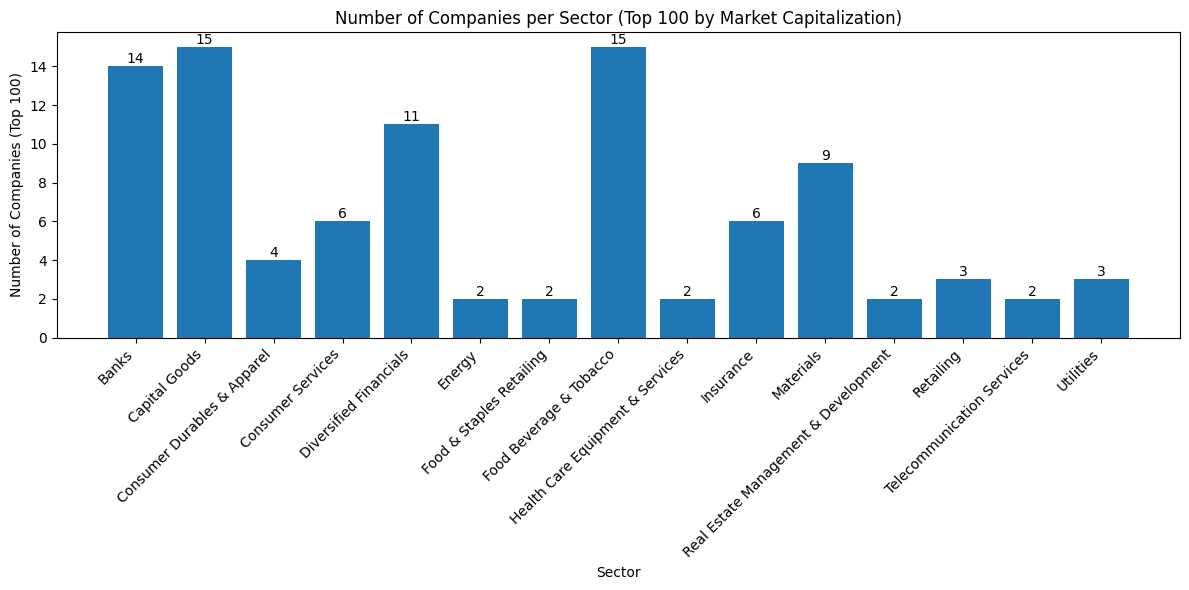

In [17]:

# Get the top 100 companies by market capitalization
top_100_companies = merged_main_df.head(100)

# Group by sector and count companies
sector_counts_top_100 = top_100_companies.groupby('Sector')['Symbol'].count()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sector_counts_top_100.index, sector_counts_top_100.values)

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel("Sector")
plt.ylabel("Number of Companies (Top 100)")
plt.title("Number of Companies per Sector (Top 100 by Market Capitalization)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
#compariosn between 1st 100 and all the companies

# Get the top 100 companies by market capitalization
top_100_companies = merged_main_df.head(100)

# Group by sector and count companies for the top 100
sector_counts_top_100 = top_100_companies.groupby('Sector')['Symbol'].count()

# Group by sector and count companies for all companies
sector_counts_all = merged_main_df.groupby('Sector')['Symbol'].count()


# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Top 100': sector_counts_top_100, 'All Companies': sector_counts_all})

# Calculate the percentage difference
comparison_df['Percentage Difference'] = ((comparison_df['Top 100'] / comparison_df['All Companies']) * 100).round(2)

# Display the comparison
print(comparison_df)


                                      Top 100  All Companies  \
Sector                                                         
Automobile & Components                   NaN              1   
Banks                                    14.0             16   
Capital Goods                            15.0             27   
Commercial & Professional Service         NaN              5   
Consumer Durables & Apparel               4.0              8   
Consumer Services                         6.0             36   
Diversified Financials                   11.0             37   
Energy                                    2.0              3   
Food & Staples Retailing                  2.0              4   
Food Beverage & Tobacco                  15.0             45   
Health Care Equipment & Services          2.0              9   
Household & Personal Product              NaN              2   
Insurance                                 6.0             11   
Materials                               

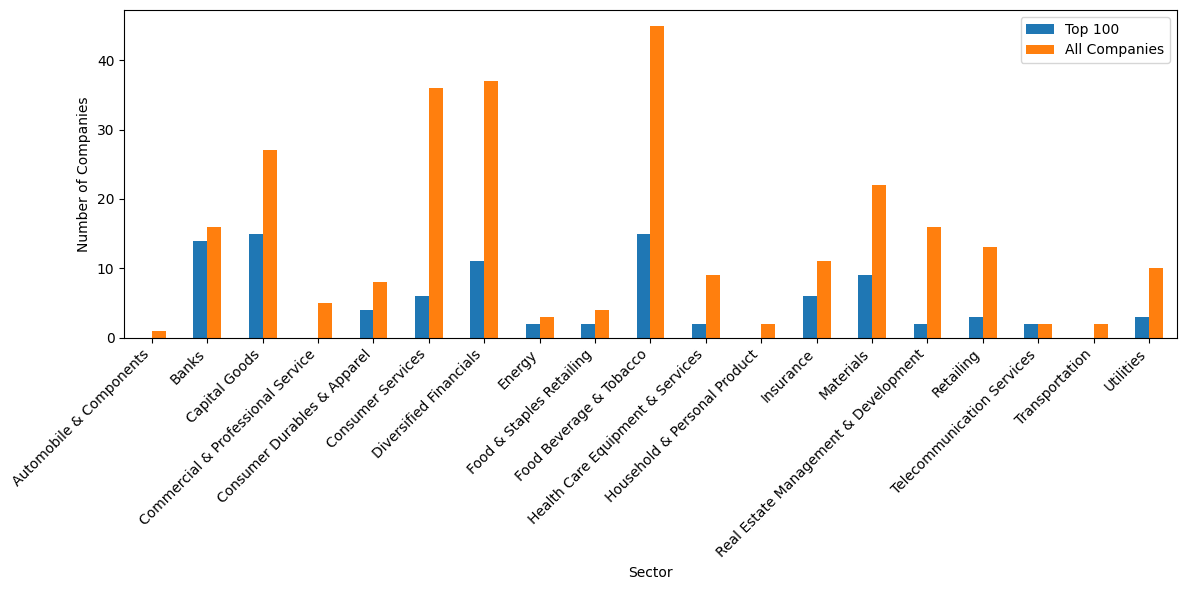

In [19]:

#  Plotting for visualization

import matplotlib.pyplot as plt

comparison_df[['Top 100', 'All Companies']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
def select_companies(merged_main_df):
    """
    Selects companies in descending order of market capitalization, ensuring:
    - All sectors are included.
    - At least 50% of companies from each sector are included.
    - A minimum of 2 companies per sector (unless only 1 exists).
    - The final selection is ranked by market capitalization.

    Args:
        merged_main_df: The DataFrame containing company data.

    Returns:
        A DataFrame with the selected companies.
    """
    selected_companies = []

    # Sort the entire dataset by Market Capitalization in descending order
    df_sorted = merged_main_df.sort_values(by="Market Capitalization", ascending=False)

    # Get unique sectors
    sectors = df_sorted["Sector"].unique()

    for sector in sectors:
        # Filter companies belonging to the current sector
        sector_df = df_sorted[df_sorted["Sector"] == sector]

        # Calculate the number of companies to select (at least 50% or minimum 2)
        num_companies = max(2, int(len(sector_df) * 0.5))

        # If the sector has only one company, select it
        num_companies = min(num_companies, len(sector_df))

        # Add the selected companies to the final list
        selected_companies.extend(sector_df.head(num_companies).to_dict('records'))

    # Convert list to DataFrame
    selected_df = pd.DataFrame(selected_companies)

    # Final sorting by market capitalization in descending order
    selected_df = selected_df.sort_values(by="Market Capitalization", ascending=False).reset_index(drop=True)

    return selected_df

# Call the function with your DataFrame
selected_companies_df = select_companies(merged_main_df)

# Display the result
selected_companies_df

,NO,Company Name,Symbol,Price (Rs),Issued Quantity,Market Capitalization,Market Cap. (as a % of Total Market Cap.),Sector
0,145,JOHN KEELLS HOLDINGS PLC,JKH.N0000,22.5,1.761561e+10,3.960000e+11,6.54,Capital Goods
1,158,L O L C HOLDINGS PLC,LOLC.N0000,694.0,4.752000e+08,3.300000e+11,5.44,Diversified Financials
2,73,CEYLON TOBACCO COMPANY PLC,CTC.N0000,1463.0,1.873238e+08,2.740000e+11,4.52,Food Beverage & Tobacco
3,87,COMMERCIAL BANK OF CEYLON PLC,COMB.N0000,152.0,1.515496e+09,2.300000e+11,3.80,Banks
4,181,LOLC FINANCE PLC,LOFC.N0000,6.6,3.307921e+10,2.180000e+11,3.60,Diversified Financials
...,...,...,...,...,...,...,...,...
130,208,ON'ALLY HOLDINGS PLC,ONAL.N0000,28.3,9.300309e+07,2.631987e+09,0.04,Real Estate Management & Development
131,265,SWADESHI INDUSTRIAL WORKS PLC,SWAD.N0000,15000.0,1.493330e+05,2.239995e+09,0.04,Household & Personal Product
132,160,LAKE HOUSE PRINTERS & PUBLISHERS PLC,LPRT.N0000,261.0,2.937245e+06,7.666209e+08,0.01,Commercial & Professional Service
133,195,MERCANTILE SHIPPING COMPANY PLC,MSL.N0000,183.0,2.844990e+06,5.206332e+08,0.01,Transportation


<ipython-input-21-c17780e27cde>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")


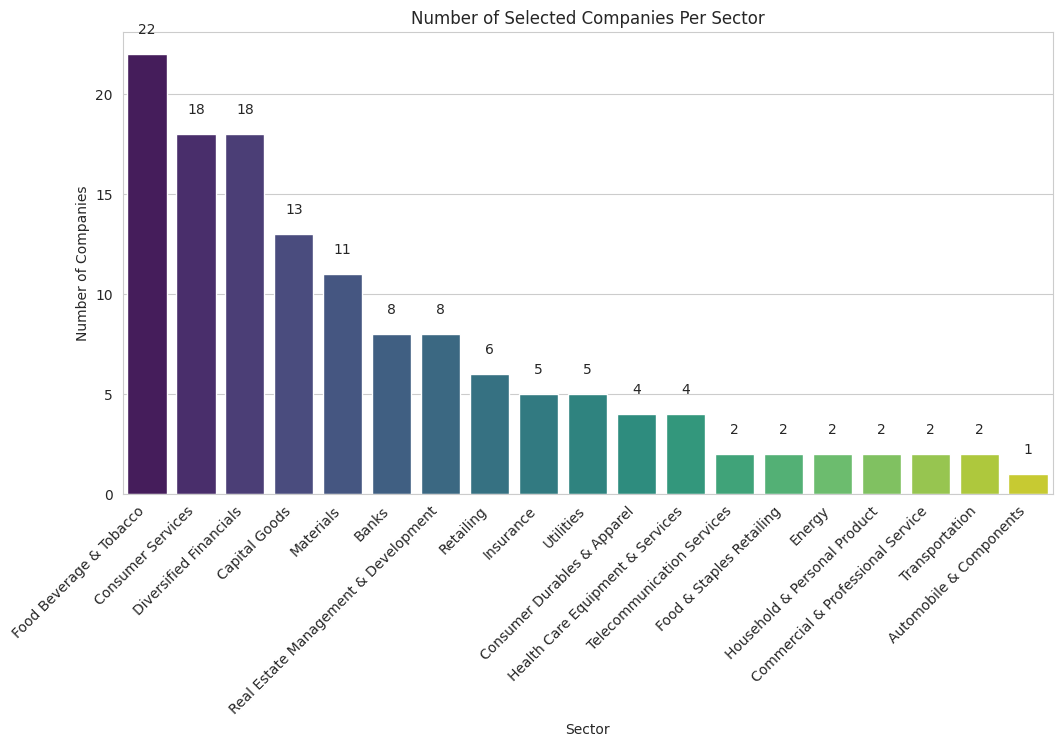

Sector-wise Company Count:
                                   Sector  Number of Companies
0                Food Beverage & Tobacco                   22
1                      Consumer Services                   18
2                 Diversified Financials                   18
3                          Capital Goods                   13
4                              Materials                   11
5                                  Banks                    8
6   Real Estate Management & Development                    8
7                              Retailing                    6
8                              Insurance                    5
9                              Utilities                    5
10           Consumer Durables & Apparel                    4
11      Health Care Equipment & Services                    4
12            Telecommunication Services                    2
13              Food & Staples Retailing                    2
14                                Energy  

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure selected_companies_df is already created
selected_companies_df = select_companies(merged_main_df)

# Count of companies per sector
sector_counts = selected_companies_df["Sector"].value_counts()

# Market capitalization per sector
sector_market_cap = selected_companies_df.groupby("Sector")["Market Capitalization"].sum().sort_values(ascending=False)

# Set the style
sns.set_style("whitegrid")

# Create a bar chart for sector-wise company count
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")
plt.xlabel("Sector")
plt.ylabel("Number of Companies")
plt.title("Number of Selected Companies Per Sector")
plt.xticks(rotation=45, ha='right')

# Show count on bars
for index, value in enumerate(sector_counts.values):
    plt.text(index, value + 1, str(value), ha='center')

plt.show()


# Display sector-wise company count as a table
sector_counts_df = pd.DataFrame({"Sector": sector_counts.index, "Number of Companies": sector_counts.values})
print("Sector-wise Company Count:\n", sector_counts_df)

# Display sector-wise market capitalization as a table
sector_market_cap_df = pd.DataFrame({"Sector": sector_market_cap.index, "Total Market Capitalization": sector_market_cap.values})
print("Sector-wise Market Capitalization:\n", sector_market_cap_df)

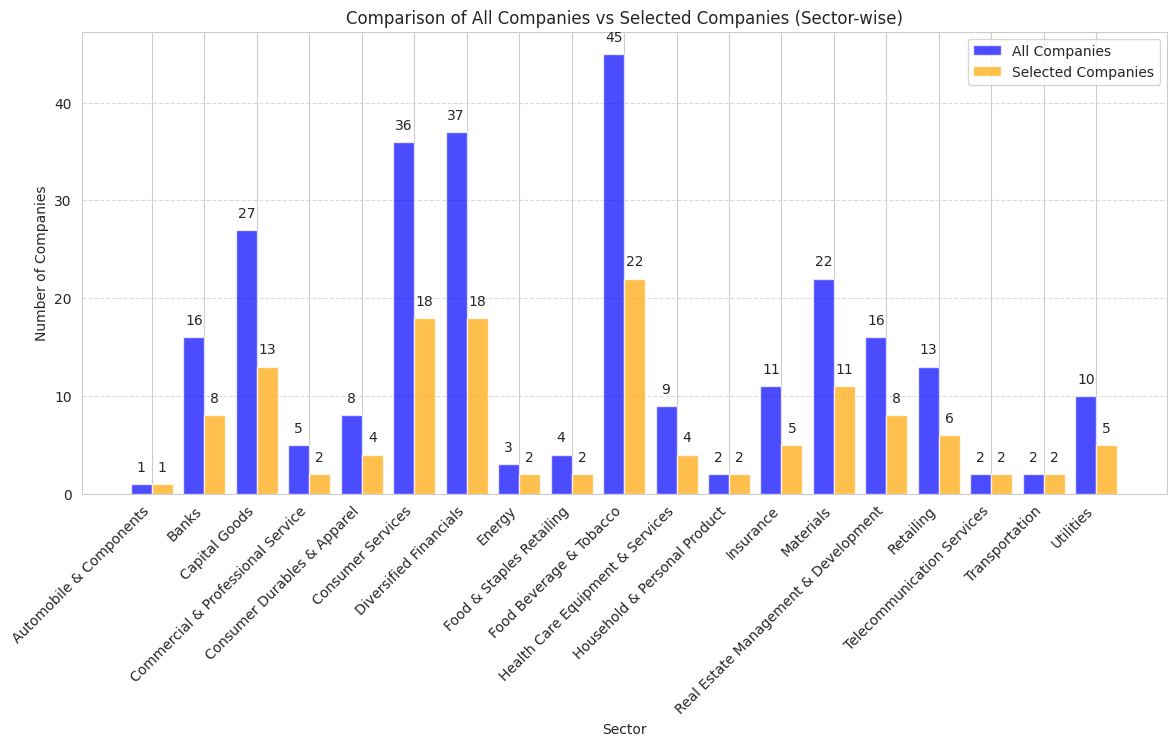

Sector-wise Company Comparison:
                                   Sector  Total Companies  Selected Companies
0                Automobile & Components                1                   1
1                                  Banks               16                   8
2                          Capital Goods               27                  13
3      Commercial & Professional Service                5                   2
4            Consumer Durables & Apparel                8                   4
5                      Consumer Services               36                  18
6                 Diversified Financials               37                  18
7                                 Energy                3                   2
8               Food & Staples Retailing                4                   2
9                Food Beverage & Tobacco               45                  22
10      Health Care Equipment & Services                9                   4
11          Household & Persona

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure selected_companies_df is created
selected_companies_df = select_companies(merged_main_df)

# Count of companies per sector (for all companies and selected companies)
sector_counts_all = merged_main_df["Sector"].value_counts().sort_index()
sector_counts_selected = selected_companies_df["Sector"].value_counts().sort_index()

# Combine into a DataFrame for comparison
sector_comparison_df = pd.DataFrame({
    "Sector": sector_counts_all.index,
    "Total Companies": sector_counts_all.values,
    "Selected Companies": sector_counts_selected.reindex(sector_counts_all.index, fill_value=0).values
})

# Visualization: Bar Chart for Comparison
plt.figure(figsize=(14, 6))
x = range(len(sector_comparison_df))

# Bar width
bar_width = 0.4

plt.bar(x, sector_comparison_df["Total Companies"], width=bar_width, label="All Companies", alpha=0.7, color="blue")
plt.bar([i + bar_width for i in x], sector_comparison_df["Selected Companies"], width=bar_width, label="Selected Companies", alpha=0.7, color="orange")

# Labels and title
plt.xlabel("Sector")
plt.ylabel("Number of Companies")
plt.title("Comparison of All Companies vs Selected Companies (Sector-wise)")
plt.xticks([i + bar_width/2 for i in x], sector_comparison_df["Sector"], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on top of bars
for i, value in enumerate(sector_comparison_df["Total Companies"]):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
for i, value in enumerate(sector_comparison_df["Selected Companies"]):
    plt.text(i + bar_width, value + 1, str(value), ha='center', va='bottom')

plt.show()

# Display sector-wise comparison table
print("Sector-wise Company Comparison:\n", sector_comparison_df)